<a href="https://colab.research.google.com/github/duellal/DS-Unit-1-Build/blob/duellal-patch-1/Animal_Center_Project_DS_Build_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Research Question:

In the United States, animal shelters are known to euthanize animals based on behavior and/or signs of aggression. By looking at the Austin, Texas Animal Center's data, I will analyze why certain animals are euthanized, the timeline to when the Center euthanizes the animals, and if the animal center is true to their statement that 90% of animals are not euthanized. 

# About the Data:

***Intakes:***

Animal Center Intakes from Oct, 1st 2013 to present. Intakes represent the status of animals as they arrive at the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners.

***Outcomes:***

Animal Center Outcomes from Oct, 1st 2013 to present. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. The Outcomes data set reflects that Austin, TX. is the largest "No Kill" city in the country.

## Importing Data and Creating One Dataframe

In [233]:
#importing packages that I will need
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib.pyplot import hist
from matplotlib import pyplot as plt 
from matplotlib.lines import Line2D
from datetime import datetime
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [3]:
intake_headers = ['Animal ID', 'Name Intake', 'Intake DateTime', 'Intake MonthYear','Found Location', 'Intake Type', 'Intake Condition', 'Animal Type',
                  'Sex Upon Intake', 'Age Upon Intake', 'Breed', 'Color']
intake = pd.read_csv('https://raw.githubusercontent.com/duellal/Datasets/main/Austin_Animal_Center_Intakes.csv', header=1, names=intake_headers)
intake.head(5)

,Animal ID,Name Intake,Intake DateTime,Intake MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex Upon Intake,Age Upon Intake,Breed,Color
0,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
1,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
2,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
3,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
4,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


In [4]:
outcome_headers = ['Animal ID', 'Name Outcome', 'Outcome DateTime', 'Outcome MonthYear','Date of Birth', 'Outcome Type', 'Outcome Subtype', 
                   'Animal Type', 'Sex Upon Outcome', 'Age Upon Outcome', 'Breed', 'Color']
outcome = pd.read_csv('https://raw.githubusercontent.com/duellal/Datasets/main/Austin_Animal_Center_Outcomes.csv', header=1, names=outcome_headers)
outcome.head(5)

,Animal ID,Name Outcome,Outcome DateTime,Outcome MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex Upon Outcome,Age Upon Outcome,Breed,Color
0,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
1,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A659412,Princess,10/05/2020 02:37:00 PM,10/05/2020 02:37:00 PM,03/24/2013,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown


In [5]:
print('Intakes:', intake.shape)
print("Outcomes:", outcome.shape)

Intakes: (123365, 12)
Outcomes: (123672, 12)


In [6]:
animal_shelter = pd.merge(intake, outcome, how='inner', on=['Animal ID'])
animal_shelter.head()

,Animal ID,Name Intake,Intake DateTime,Intake MonthYear,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex Upon Intake,Age Upon Intake,Breed_x,Color_x,Name Outcome,Outcome DateTime,Outcome MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex Upon Outcome,Age Upon Outcome,Breed_y,Color_y
0,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Belle,07/05/2015 03:13:00 PM,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
1,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Runster,04/21/2016 05:17:00 PM,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White
2,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,10/21/2013 11:39:00 AM,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
3,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Rio,07/02/2014 02:16:00 PM,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
4,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate,Odin,02/21/2017 05:44:00 PM,02/21/2017 05:44:00 PM,02/18/2015,Return to Owner,NaN,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


In [7]:
#Based on how many animal outcomes do not have an animal intake, I decided to look at the Animal ID intake to see if there were duplicates
intake['Animal ID'].value_counts()

A721033    33
A718223    14
A718877    12
A706536    11
A716018     9
           ..
A740047     1
A761025     1
A775724     1
A774038     1
A736185     1
Name: Animal ID, Length: 110292, dtype: int64

In [8]:
#Based on how many animal outcomes do not have an animal intake, I decided to look at the Animal ID intake to see if there were duplicates
outcome['Animal ID'].value_counts()

A721033    33
A718223    14
A718877    12
A706536    11
A616444     9
           ..
A719110     1
A702751     1
A724882     1
A742464     1
A736185     1
Name: Animal ID, Length: 110607, dtype: int64

##Cleaning Up the Dataframe created

In [9]:
#Now that I have gathered the dataframe for all animals with intakes and outcomes, I will clean up the dataframe by first dropping the columns not needed
animal_shelter = animal_shelter.drop(['Intake MonthYear', 'Found Location', 'Outcome MonthYear', 'Breed_y', 'Color_y', 'Animal Type_y'], axis=1)
animal_shelter

,Animal ID,Name Intake,Intake DateTime,Intake Type,Intake Condition,Animal Type_x,Sex Upon Intake,Age Upon Intake,Breed_x,Color_x,Name Outcome,Outcome DateTime,Date of Birth,Outcome Type,Outcome Subtype,Sex Upon Outcome,Age Upon Outcome
0,A706918,Belle,07/05/2015 12:59:00 PM,Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Belle,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Spayed Female,8 years
1,A724273,Runster,04/14/2016 06:43:00 PM,Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Runster,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Neutered Male,1 year
2,A665644,NaN,10/21/2013 07:59:00 AM,Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Intact Female,4 weeks
3,A682524,Rio,06/29/2014 10:38:00 AM,Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Rio,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Neutered Male,4 years
4,A743852,Odin,02/18/2017 12:46:00 PM,Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate,Odin,02/21/2017 05:44:00 PM,02/18/2015,Return to Owner,NaN,Neutered Male,2 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159275,A828439,NaN,01/16/2021 01:30:00 PM,Owner Surrender,Injured,Dog,Intact Female,8 months,Great Pyrenees,White/Black,NaN,01/16/2021 04:40:00 PM,05/16/2020,Euthanasia,Suffering,Intact Female,8 months
159276,A828379,NaN,01/15/2021 08:57:00 AM,Wildlife,Sick,Other,Unknown,1 year,Skunk,Black/White,NaN,01/15/2021 09:36:00 AM,01/15/2020,Euthanasia,Rabies Risk,Unknown,1 year
159277,A828445,Blue,01/16/2021 04:15:00 PM,Stray,Normal,Dog,Intact Male,2 years,Boxer,Brown/White,Blue,01/17/2021 01:33:00 PM,01/16/2019,Return to Owner,NaN,Intact Male,2 years
159278,A828463,Ej,01/17/2021 11:27:00 AM,Owner Surrender,Injured,Cat,Spayed Female,6 years,Domestic Shorthair,Brown Tabby,Ej,01/17/2021 02:00:00 PM,01/17/2015,Transfer,Partner,Spayed Female,6 years


In [10]:
animal_shelter.isnull().sum()

#The name NaNs should not effect the analysis. However, Outcome Subtype may effect it. If I use this section, I will have to address the NaNs

Animal ID               0
Name Intake         39651
Intake DateTime         0
Intake Type             0
Intake Condition        0
Animal Type_x           0
Sex Upon Intake         1
Age Upon Intake         0
Breed_x                 0
Color_x                 0
Name Outcome        39651
Outcome DateTime        0
Date of Birth           0
Outcome Type           16
Outcome Subtype     97001
Sex Upon Outcome        1
Age Upon Outcome        8
dtype: int64

In [11]:
#There are a lot of NaNs for names, however that is understandable since many animals in shelters are strays, or wildlife and may not have a name.
#However, there seems to be a considerable amount of Outcome Subtype being NaN values, especially since only 16 Outcome Types are NaNs.
#I will look to see why that is, first seeing what subtypes there are.

animal_shelter['Outcome Type'].value_counts()

#Need to figure out how to make a table with column A being Outcome Type and column B being the Outcome Subtypes. 

Adoption           71803
Transfer           39824
Return to Owner    35793
Euthanasia          8668
Rto-Adopt           1312
Died                1187
Disposal             566
Missing               91
Relocate              20
Name: Outcome Type, dtype: int64

In [12]:
animal_shelter.groupby('Outcome Type')['Outcome Subtype'].unique()

#Looking at the subtype of the outcomes, we can see that all outcome types except Transfer have NaN values. 

Outcome Type
Adoption                                [Foster, nan, Offsite, Barn]
Died               [In Kennel, nan, In Surgery, At Vet, Enroute, ...
Disposal                                                       [nan]
Euthanasia         [Suffering, Rabies Risk, At Vet, Medical, nan,...
Missing                  [In Foster, Possible Theft, nan, In Kennel]
Relocate                                                       [nan]
Return to Owner        [nan, Field, At Vet, Prc, Foster, Customer S]
Rto-Adopt                                                      [nan]
Transfer                            [Partner, SCRP, Snr, Barn, Emer]
Name: Outcome Subtype, dtype: object

In [13]:
#I want to see what the other values in Died and Euthanasia are

outcome_subtypes = animal_shelter.groupby('Outcome Type')['Outcome Subtype'].unique()
print('Died Subtype:\n', outcome_subtypes['Died'])
print('Euthanasia Subtypes:\n', outcome_subtypes['Euthanasia'])

Died Subtype:
 ['In Kennel' nan 'In Surgery' 'At Vet' 'Enroute' 'In Foster']
Euthanasia Subtypes:
 ['Suffering' 'Rabies Risk' 'At Vet' 'Medical' nan 'Underage' 'Aggressive'
 'Court/Investigation' 'Behavior']


##Outcomes for Animals who have Died or have been Euthanized

This section will look at the different outcomes for the animals. I will make a visualization in order to accurately represent the data found about the outcomes.

In [14]:
animal_shelter['Outcome Type'].value_counts()

Adoption           71803
Transfer           39824
Return to Owner    35793
Euthanasia          8668
Rto-Adopt           1312
Died                1187
Disposal             566
Missing               91
Relocate              20
Name: Outcome Type, dtype: int64

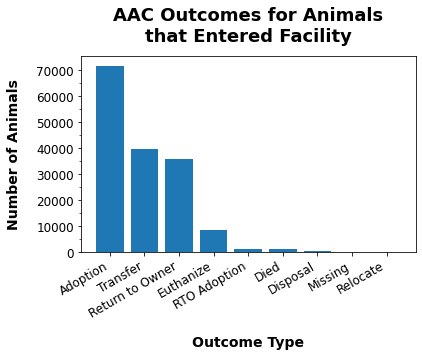

In [15]:
fig, ax = plt.subplots()

plt.bar(x=['Adoption', 'Transfer', 'Return to Owner', 'Euthanize', 'RTO Adoption', 'Died', 'Disposal', 'Missing', 'Relocate'],
        height=animal_shelter['Outcome Type'].value_counts())

plt.xlabel('Outcome Type', fontweight="bold", fontsize=14, labelpad=15)
plt.ylabel('Number of Animals', fontweight="bold", fontsize=14, labelpad=15)
plt.title('AAC Outcomes for Animals\nthat Entered Facility', fontweight='bold', fontsize=18, pad=15)

ax.set_yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
ax.set_yticks([5000, 15000, 25000, 35000, 45000, 55000, 65000], minor=True)

ax.set_xticklabels(labels=['Adoption', 'Transfer', 'Return to Owner', 'Euthanize', 'RTO Adoption', 'Died', 'Disposal', 'Missing', 'Relocate'],
                   fontsize=12)
ax.set_yticklabels(labels=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], fontsize=12)

fig.autofmt_xdate()

plt.show()

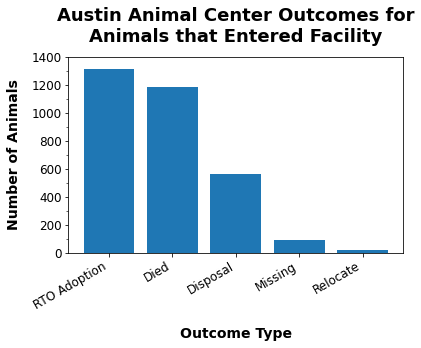

In [16]:
#Making a bar graph for the outcomes with a lower amount of animals
fig, ax = plt.subplots()

plt.bar(x=['RTO Adoption', 'Died', 'Disposal', 'Missing', 'Relocate'],
        height=[1312, 1187, 566, 91, 20])

plt.xlabel('Outcome Type', fontweight='bold', fontsize=14, labelpad=15)
plt.ylabel('Number of Animals', fontweight='bold', fontsize=14, labelpad=10)
plt.title('Austin Animal Center Outcomes for\nAnimals that Entered Facility', fontweight='bold', fontsize=18, pad=15)

ax.set_yticks([0, 200, 400, 600, 800, 1000, 1200, 1400])
ax.set_yticks([100, 300, 500, 700, 900, 1100, 1300], minor=True)
ax.set_xticklabels(labels=['RTO Adoption', 'Died', 'Disposal', 'Missing', 'Relocate'], fontsize=12)
ax.set_yticklabels(labels=[0, 200, 400, 600, 800, 1000, 1200, 1400], fontsize=12)

fig.autofmt_xdate()

plt.show()

In [17]:
outcome = animal_shelter['Outcome Type'].reset_index()
outcome.head(3)

,index,Outcome Type
0,0,Return to Owner
1,1,Return to Owner
2,2,Transfer


In [18]:
outcome_sub = animal_shelter['Outcome Subtype'].reset_index()
outcome_sub.head(3)

,index,Outcome Subtype
0,0,NaN
1,1,NaN
2,2,Partner


In [19]:
animal_type = animal_shelter['Animal Type_x'].reset_index()
animal_type.head(3)

,index,Animal Type_x
0,0,Dog
1,1,Dog
2,2,Cat


In [20]:
animal_breed = animal_shelter['Breed_x'].reset_index()
animal_breed.head(3)

,index,Breed_x
0,0,English Springer Spaniel
1,1,Basenji Mix
2,2,Domestic Shorthair Mix


In [21]:
outcome_subtype_no_nan = animal_shelter['Outcome Subtype'].dropna().reset_index()

In [22]:
outcomes = pd.merge(outcome, outcome_sub, on='index')
outcomes = pd.merge(outcomes, animal_type, on='index')
outcomes = pd.merge(outcomes, animal_breed)
outcomes.head(3)

,index,Outcome Type,Outcome Subtype,Animal Type_x,Breed_x
0,0,Return to Owner,NaN,Dog,English Springer Spaniel
1,1,Return to Owner,NaN,Dog,Basenji Mix
2,2,Transfer,Partner,Cat,Domestic Shorthair Mix


In [23]:
outcomes_no_index = outcomes.drop('index', axis=1)
outcomes_no_index.head(3)

,Outcome Type,Outcome Subtype,Animal Type_x,Breed_x
0,Return to Owner,NaN,Dog,English Springer Spaniel
1,Return to Owner,NaN,Dog,Basenji Mix
2,Transfer,Partner,Cat,Domestic Shorthair Mix


In [24]:
died_subtypes = outcomes_no_index[(outcomes_no_index['Outcome Type'] == 'Died')]
died_subtypes.head(3)

,Outcome Type,Outcome Subtype,Animal Type_x,Breed_x
56,Died,In Kennel,Cat,Domestic Shorthair Mix
136,Died,NaN,Other,Bat
622,Died,In Surgery,Dog,Miniature Pinscher/Yorkshire Terrier


In [25]:
died_subtypes.isnull().sum()

Outcome Type         0
Outcome Subtype    109
Animal Type_x        0
Breed_x              0
dtype: int64

In [26]:
died_subtypes['Outcome Subtype'].value_counts()

In Kennel     596
In Foster     279
At Vet         97
Enroute        84
In Surgery     22
Name: Outcome Subtype, dtype: int64

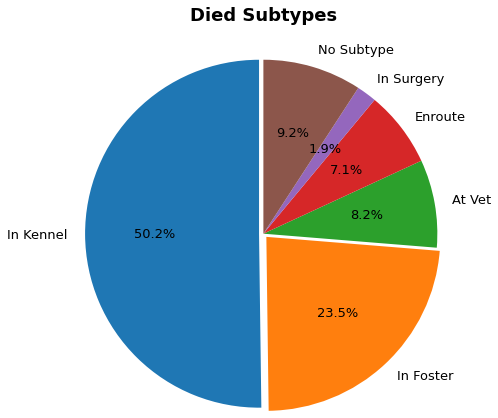

In [165]:
#Making a pie chart for outcome subtypes for Died
died_labels = (['In Kennel', 'In Foster', 'At Vet', 'Enroute', 'In Surgery', 'No Subtype'])
died_sizes = (596, 279, 97, 84, 22, 109)

fig, ax = plt.subplots()

ax.pie(died_sizes, labels=died_labels, autopct='%1.1f%%', radius=2, startangle=90, explode=[0.05, 0.05, 0, 0, 0, 0],
       textprops={'fontsize': 13})
ax.set_title('Died Subtypes', fontweight='bold', y=1.45, fontsize=18)

plt.show()

In [28]:
euthanasia_subtypes = outcomes_no_index[(outcomes_no_index['Outcome Type'] == 'Euthanasia')]
euthanasia_subtypes.head(3)

,Outcome Type,Outcome Subtype,Animal Type_x,Breed_x
17,Euthanasia,Suffering,Cat,Domestic Shorthair Mix
39,Euthanasia,Rabies Risk,Other,Bat Mix
49,Euthanasia,Suffering,Dog,Boxer Mix


In [29]:
euthanasia_subtypes.isnull().sum()

Outcome Type         0
Outcome Subtype    227
Animal Type_x        0
Breed_x              0
dtype: int64

In [30]:
euthanasia_subtypes['Outcome Subtype'].value_counts()

Rabies Risk            3683
Suffering              3307
Aggressive              688
Medical                 313
Behavior                183
At Vet                  179
Court/Investigation      52
Underage                 36
Name: Outcome Subtype, dtype: int64

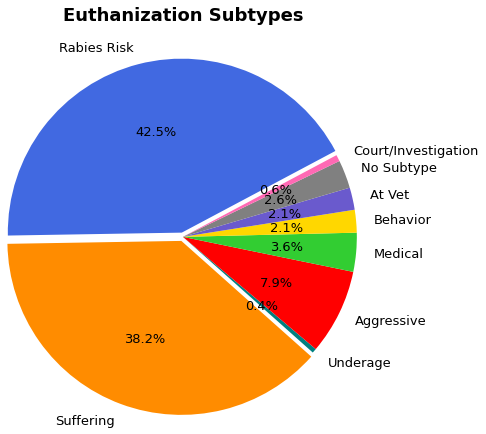

In [164]:
#Making a pie chart for outcome subtypes for Euthanization
euth_labels = ['Rabies Risk', 'Suffering', 'Underage', 'Aggressive', 'Medical', 'Behavior', 'At Vet', 'No Subtype', 'Court/Investigation']
euth_sizes = (3683, 3307, 36, 688, 313, 183, 179, 227, 52)

fig, ax = plt.subplots()

ax.pie(euth_sizes, labels=euth_labels, radius=2, autopct='%1.1f%%', startangle=28, explode=[0.05, 0.05, 0, 0, 0, 0, 0, 0, 0],
        colors=['royalblue', 'darkorange', 'teal', 'red', 'limegreen', 'gold', 'slateblue', 'grey', 'hotpink'], textprops={'fontsize': 13})

ax.set_title('Euthanization Subtypes', fontweight='bold', y=1.45, pad=10, loc='center', fontsize=18)

plt.show()

##Animal Types at the Facility

In [32]:
outcomes_no_index['Animal Type_x'].value_counts()

Dog          101323
Cat           50753
Other          6604
Bird            581
Livestock        19
Name: Animal Type_x, dtype: int64

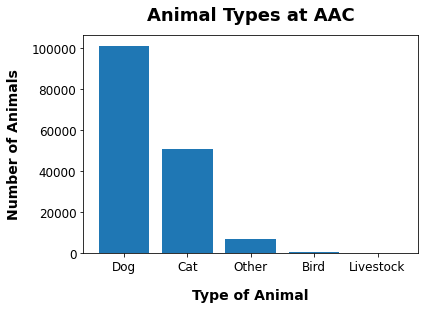

In [33]:
fig, ax = plt.subplots()

plt.bar(x=['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], height=outcomes_no_index['Animal Type_x'].value_counts())

ax.set_xlabel('Type of Animal', fontweight="bold", fontsize=14, labelpad=15)
ax.set_ylabel('Number of Animals', fontweight='bold', fontsize=14, labelpad=10)
ax.set_title('Animal Types at AAC', fontweight='bold', fontsize=18, pad=15)
ax.set_xticklabels(labels=['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], fontsize=12)
ax.set_yticklabels(labels=[0, 20000, 40000, 60000, 80000, 100000], fontsize=12)

plt.show()

In [177]:
pd.DataFrame({'Dogs': [101323], 'Cats': [50753], 'Other':[6604] , 'Birds': [581], 'Livestock': [19]})

,Dogs,Cats,Other,Birds,Livestock
0,101323,50753,6604,581,19


In [204]:
fig = go.Figure(data=[go.Table(header=dict(values=['Dogs', 'Cats', 'Birds', 'Livestock', 'Other']),
                               cells=dict(values=[[101323], [50753], [581], [19], [6604]])), 
                     ])
fig.update_layout(width=600, title='Animal Types at AAC')

fig.show()

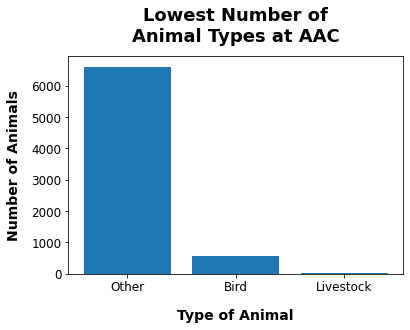

In [34]:
fig, ax = plt.subplots()

plt.bar(x=['Other', 'Bird', 'Livestock'], height=[6604, 581, 19])

ax.set_xlabel('Type of Animal', fontweight="bold", fontsize=14, labelpad=15)
ax.set_ylabel('Number of Animals', fontweight="bold", fontsize=14, labelpad=10)
ax.set_title('Lowest Number of\nAnimal Types at AAC', fontweight='bold', fontsize=18, pad=15)
ax.set_xticklabels(labels=['Other', 'Bird', 'Livestock'], fontsize=12)
ax.set_yticklabels(labels=[0, 1000, 2000, 3000, 4000, 5000, 6000], fontsize=12)

plt.show()

In [35]:
other_animals = outcomes[(outcomes['Animal Type_x'] == 'Other')]
other_animals.head(3)

,index,Outcome Type,Outcome Subtype,Animal Type_x,Breed_x
34,34,Disposal,NaN,Other,Bat
39,39,Euthanasia,Rabies Risk,Other,Bat Mix
107,107,Euthanasia,Suffering,Other,Hamster Mix


In [36]:
other_animals['Breed_x'].value_counts()

Bat Mix                 1760
Bat                     1455
Raccoon Mix              539
Raccoon                  411
Rabbit Sh Mix            343
                        ... 
Hotot                      1
Prairie Dog Mix            1
Tropical Mix               1
Chinchilla-Amer            1
Rex-Mini/Lop-English       1
Name: Breed_x, Length: 120, dtype: int64

###Animal Types at the Facility Whom were Euthanized

In [37]:
euthanasia_subtypes['Animal Type_x'].value_counts()

Other        4493
Dog          2079
Cat          1978
Bird          117
Livestock       1
Name: Animal Type_x, dtype: int64

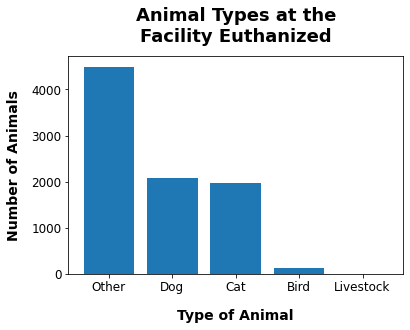

In [39]:
fig, ax = plt.subplots()

plt.bar(x=['Other', 'Dog', 'Cat', 'Bird', 'Livestock'], height=euthanasia_subtypes['Animal Type_x'].value_counts())

ax.set_xlabel('Type of Animal', fontweight="bold", fontsize=14, labelpad=15)
ax.set_ylabel('Number of Animals', fontweight="bold", fontsize=14, labelpad=10)
ax.set_title('Animal Types at the\nFacility Euthanized', fontweight="bold", fontsize=18, pad=15)
ax.set_xticklabels(labels=['Other', 'Dog', 'Cat', 'Bird', 'Livestock'], fontsize=12)
ax.set_yticklabels(labels=[0, 1000, 2000, 3000, 4000], fontsize=12)

plt.show()

In [178]:
pd.DataFrame({'Dogs': [2079], 'Cats': [1978], 'Other':[4493] , 'Birds': [117], 'Livestock': [1]}, )

,Dogs,Cats,Other,Birds,Livestock
0,2079,1978,4493,117,1


In [207]:
fig = go.Figure(data=[go.Table(header=dict(values=['Dogs', 'Cats', 'Birds', 'Livestock', 'Other']),
                               cells=dict(values=[[2079], [1978], [117], [1], [4493]])), 
                     ])
fig.update_layout(width=600, title='Animal Types at the Facility Euthanized')

fig.show()

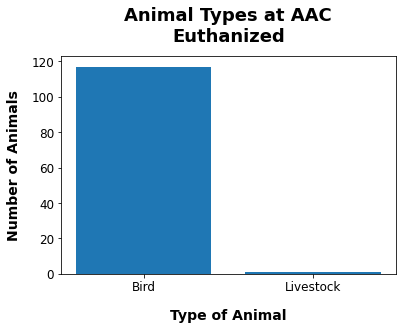

In [40]:
fig, ax = plt.subplots()

plt.bar(x=['Bird', 'Livestock'], height=[117, 1])

ax.set_xlabel('Type of Animal', fontweight="bold", fontsize=14, labelpad=15)
ax.set_ylabel('Number of Animals', fontweight='bold', fontsize=14, labelpad=10)
ax.set_title('Animal Types at AAC\nEuthanized', fontweight='bold', fontsize=18, pad=15)
ax.set_xticklabels(labels=['Bird', 'Livestock'], fontsize=12)
ax.set_yticklabels(labels=[0, 20, 40, 60, 80, 100, 120], fontsize=12)

plt.show()

##Euthanization Timeline Dataframe

In [41]:
animal_shelter.head()

,Animal ID,Name Intake,Intake DateTime,Intake Type,Intake Condition,Animal Type_x,Sex Upon Intake,Age Upon Intake,Breed_x,Color_x,Name Outcome,Outcome DateTime,Date of Birth,Outcome Type,Outcome Subtype,Sex Upon Outcome,Age Upon Outcome
0,A706918,Belle,07/05/2015 12:59:00 PM,Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Belle,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Spayed Female,8 years
1,A724273,Runster,04/14/2016 06:43:00 PM,Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Runster,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Neutered Male,1 year
2,A665644,NaN,10/21/2013 07:59:00 AM,Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Intact Female,4 weeks
3,A682524,Rio,06/29/2014 10:38:00 AM,Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Rio,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Neutered Male,4 years
4,A743852,Odin,02/18/2017 12:46:00 PM,Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate,Odin,02/21/2017 05:44:00 PM,02/18/2015,Return to Owner,NaN,Neutered Male,2 years


In [42]:
animal_timeline = animal_shelter.drop(['Animal ID', 'Name Intake', 'Intake Type', 'Intake Condition', 	
                                      'Sex Upon Intake', 'Age Upon Intake', 'Name Outcome',	
                                      'Date of Birth', 'Sex Upon Outcome', 'Age Upon Outcome'], axis=1)
animal_timeline.head()

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype
0,07/05/2015 12:59:00 PM,Dog,English Springer Spaniel,White/Liver,07/05/2015 03:13:00 PM,Return to Owner,NaN
1,04/14/2016 06:43:00 PM,Dog,Basenji Mix,Sable/White,04/21/2016 05:17:00 PM,Return to Owner,NaN
2,10/21/2013 07:59:00 AM,Cat,Domestic Shorthair Mix,Calico,10/21/2013 11:39:00 AM,Transfer,Partner
3,06/29/2014 10:38:00 AM,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,07/02/2014 02:16:00 PM,Return to Owner,NaN
4,02/18/2017 12:46:00 PM,Dog,Labrador Retriever Mix,Chocolate,02/21/2017 05:44:00 PM,Return to Owner,NaN


In [43]:
euth_datetime = animal_timeline[(animal_timeline['Outcome Type'] == 'Euthanasia')].reset_index()
euth_datetime = euth_datetime.drop('index', axis=1)
euth_datetime.head()

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype
0,02/04/2017 10:10:00 AM,Cat,Domestic Shorthair Mix,Black/White,02/04/2017 10:48:00 AM,Euthanasia,Suffering
1,03/24/2016 04:39:00 PM,Other,Bat Mix,Brown,03/24/2016 05:17:00 PM,Euthanasia,Rabies Risk
2,09/02/2019 11:52:00 AM,Dog,Boxer Mix,White,09/02/2019 01:12:00 PM,Euthanasia,Suffering
3,05/06/2019 09:30:00 PM,Dog,Boxer Mix,White,09/02/2019 01:12:00 PM,Euthanasia,Suffering
4,07/16/2019 10:35:00 AM,Dog,Boxer Mix,White,09/02/2019 01:12:00 PM,Euthanasia,Suffering


In [44]:
euth_datetime = euth_datetime.reset_index()
euth_datetime.head()

,index,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype
0,0,02/04/2017 10:10:00 AM,Cat,Domestic Shorthair Mix,Black/White,02/04/2017 10:48:00 AM,Euthanasia,Suffering
1,1,03/24/2016 04:39:00 PM,Other,Bat Mix,Brown,03/24/2016 05:17:00 PM,Euthanasia,Rabies Risk
2,2,09/02/2019 11:52:00 AM,Dog,Boxer Mix,White,09/02/2019 01:12:00 PM,Euthanasia,Suffering
3,3,05/06/2019 09:30:00 PM,Dog,Boxer Mix,White,09/02/2019 01:12:00 PM,Euthanasia,Suffering
4,4,07/16/2019 10:35:00 AM,Dog,Boxer Mix,White,09/02/2019 01:12:00 PM,Euthanasia,Suffering


In [45]:
euth_datetime['Intake DateTime'] = pd.to_datetime(euth_datetime['Intake DateTime'])
euth_datetime['Outcome DateTime'] =  pd.to_datetime(euth_datetime['Outcome DateTime'])

In [46]:
euth_in_date = euth_datetime['Intake DateTime'].dt.date.reset_index()
euth_in_time = euth_datetime['Intake DateTime'].dt.time.reset_index()
euth_out_date = euth_datetime['Outcome DateTime'].dt.date.reset_index()
euth_out_time = euth_datetime['Outcome DateTime'].dt.time.reset_index()

euth_in_date.head()

,index,Intake DateTime
0,0,2017-02-04
1,1,2016-03-24
2,2,2019-09-02
3,3,2019-05-06
4,4,2019-07-16


In [47]:
euth_in_datetime = pd.merge(euth_in_date, euth_in_time, on='index')
euth_in_datetime.head()

,index,Intake DateTime_x,Intake DateTime_y
0,0,2017-02-04,10:10:00
1,1,2016-03-24,16:39:00
2,2,2019-09-02,11:52:00
3,3,2019-05-06,21:30:00
4,4,2019-07-16,10:35:00


In [48]:
euth_out_datetime = pd.merge(euth_out_date, euth_out_time, on='index')
euth_out_datetime.head()

,index,Outcome DateTime_x,Outcome DateTime_y
0,0,2017-02-04,10:48:00
1,1,2016-03-24,17:17:00
2,2,2019-09-02,13:12:00
3,3,2019-09-02,13:12:00
4,4,2019-09-02,13:12:00


In [49]:
euth_time = pd.merge(euth_in_datetime, euth_out_datetime, on='index')
euth_time.head()

,index,Intake DateTime_x,Intake DateTime_y,Outcome DateTime_x,Outcome DateTime_y
0,0,2017-02-04,10:10:00,2017-02-04,10:48:00
1,1,2016-03-24,16:39:00,2016-03-24,17:17:00
2,2,2019-09-02,11:52:00,2019-09-02,13:12:00
3,3,2019-05-06,21:30:00,2019-09-02,13:12:00
4,4,2019-07-16,10:35:00,2019-09-02,13:12:00


In [50]:
euth_time.columns = ['index','Intake Date','Intake Time', 'Outcome Date','Outcome Time']
euth_time.head()

,index,Intake Date,Intake Time,Outcome Date,Outcome Time
0,0,2017-02-04,10:10:00,2017-02-04,10:48:00
1,1,2016-03-24,16:39:00,2016-03-24,17:17:00
2,2,2019-09-02,11:52:00,2019-09-02,13:12:00
3,3,2019-05-06,21:30:00,2019-09-02,13:12:00
4,4,2019-07-16,10:35:00,2019-09-02,13:12:00


In [51]:
euth_timeline = pd.merge(euth_datetime, euth_time, on='index')
euth_timeline = euth_timeline.drop('index', axis=1)
euth_timeline.head()

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype,Intake Date,Intake Time,Outcome Date,Outcome Time
0,2017-02-04 10:10:00,Cat,Domestic Shorthair Mix,Black/White,2017-02-04 10:48:00,Euthanasia,Suffering,2017-02-04,10:10:00,2017-02-04,10:48:00
1,2016-03-24 16:39:00,Other,Bat Mix,Brown,2016-03-24 17:17:00,Euthanasia,Rabies Risk,2016-03-24,16:39:00,2016-03-24,17:17:00
2,2019-09-02 11:52:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-09-02,11:52:00,2019-09-02,13:12:00
3,2019-05-06 21:30:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-05-06,21:30:00,2019-09-02,13:12:00
4,2019-07-16 10:35:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-07-16,10:35:00,2019-09-02,13:12:00


In [52]:
euth_timeline['Days to Euth'] = (euth_timeline['Outcome Date'] - euth_timeline['Intake Date']).dt.days
euth_timeline.head(3)

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype,Intake Date,Intake Time,Outcome Date,Outcome Time,Days to Euth
0,2017-02-04 10:10:00,Cat,Domestic Shorthair Mix,Black/White,2017-02-04 10:48:00,Euthanasia,Suffering,2017-02-04,10:10:00,2017-02-04,10:48:00,0
1,2016-03-24 16:39:00,Other,Bat Mix,Brown,2016-03-24 17:17:00,Euthanasia,Rabies Risk,2016-03-24,16:39:00,2016-03-24,17:17:00,0
2,2019-09-02 11:52:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-09-02,11:52:00,2019-09-02,13:12:00,0


##Euthanization Graph Based on Intake to Outcome Days for Dogs

In [53]:
euth_dogs = euth_timeline[(euth_timeline['Animal Type_x'] == 'Dog')].reset_index()
euth_dogs = euth_dogs.drop('index', axis=1)
euth_dogs.head()

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype,Intake Date,Intake Time,Outcome Date,Outcome Time,Days to Euth
0,2019-09-02 11:52:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-09-02,11:52:00,2019-09-02,13:12:00,0
1,2019-05-06 21:30:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-05-06,21:30:00,2019-09-02,13:12:00,119
2,2019-07-16 10:35:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-07-16,10:35:00,2019-09-02,13:12:00,48
3,2016-06-07 17:51:00,Dog,Wire Hair Fox Terrier Mix,White/Brown,2016-06-07 18:00:00,Euthanasia,Suffering,2016-06-07,17:51:00,2016-06-07,18:00:00,0
4,2015-01-23 12:13:00,Dog,Pit Bull Mix,White/Brown Brindle,2015-01-24 08:46:00,Euthanasia,Aggressive,2015-01-23,12:13:00,2015-01-24,08:46:00,1


In [54]:
euth_dogs['Days to Euth'].value_counts().sort_index()

-506       1
 0       543
 1       189
 2        96
 3        86
        ... 
 1894      1
 1971      1
 2055      1
 2061      1
 2123      1
Name: Days to Euth, Length: 283, dtype: int64

In [55]:
days_to_euth = (euth_dogs['Outcome Date'] - euth_dogs['Intake Date']).dt.days.tolist()
days_to_euth.index(-506)

1032

In [56]:
euth_dogs = euth_dogs.drop(labels=[1032], axis=0)
euth_dogs.head()

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype,Intake Date,Intake Time,Outcome Date,Outcome Time,Days to Euth
0,2019-09-02 11:52:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-09-02,11:52:00,2019-09-02,13:12:00,0
1,2019-05-06 21:30:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-05-06,21:30:00,2019-09-02,13:12:00,119
2,2019-07-16 10:35:00,Dog,Boxer Mix,White,2019-09-02 13:12:00,Euthanasia,Suffering,2019-07-16,10:35:00,2019-09-02,13:12:00,48
3,2016-06-07 17:51:00,Dog,Wire Hair Fox Terrier Mix,White/Brown,2016-06-07 18:00:00,Euthanasia,Suffering,2016-06-07,17:51:00,2016-06-07,18:00:00,0
4,2015-01-23 12:13:00,Dog,Pit Bull Mix,White/Brown Brindle,2015-01-24 08:46:00,Euthanasia,Aggressive,2015-01-23,12:13:00,2015-01-24,08:46:00,1


In [57]:
euth_dogs['Days to Euth'].value_counts().sort_index()

0       543
1       189
2        96
3        86
4       125
       ... 
1894      1
1971      1
2055      1
2061      1
2123      1
Name: Days to Euth, Length: 282, dtype: int64

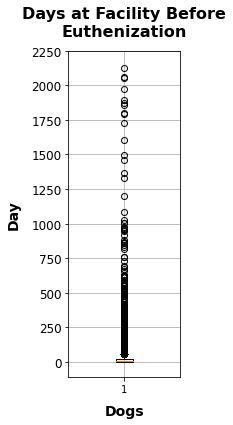

In [58]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_dogs['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('Dogs', fontweight='bold', fontsize=14, labelpad=10)
ax.set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
ax.set_yticklabels(labels=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250], fontsize=12)


plt.grid(True)
plt.show()

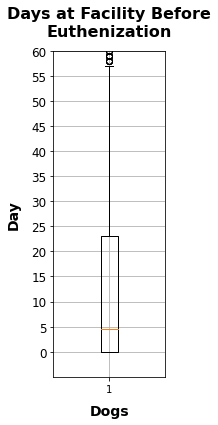

In [59]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_dogs['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('Dogs', fontweight='bold', fontsize=14, labelpad=10)
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
ax.set_yticklabels(labels=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], fontsize=12)
ax.set_ylim(-5,60)

plt.grid(True)
plt.show()

##Euthanization Graph Based on Intake to Outcome Days for Cats

In [60]:
euth_cats = euth_timeline[(euth_timeline['Animal Type_x'] == 'Cat')].reset_index()
euth_cats = euth_cats.drop('index', axis=1)
euth_cats.head()

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype,Intake Date,Intake Time,Outcome Date,Outcome Time,Days to Euth
0,2017-02-04 10:10:00,Cat,Domestic Shorthair Mix,Black/White,2017-02-04 10:48:00,Euthanasia,Suffering,2017-02-04,10:10:00,2017-02-04,10:48:00,0
1,2019-04-02 07:16:00,Cat,Domestic Shorthair Mix,Brown Tabby,2019-04-02 08:52:00,Euthanasia,At Vet,2019-04-02,07:16:00,2019-04-02,08:52:00,0
2,2016-06-19 16:13:00,Cat,Domestic Shorthair Mix,Black,2016-06-19 16:30:00,Euthanasia,Suffering,2016-06-19,16:13:00,2016-06-19,16:30:00,0
3,2020-01-16 12:08:00,Cat,Domestic Longhair,Black/White,2020-01-25 11:57:00,Euthanasia,Suffering,2020-01-16,12:08:00,2020-01-25,11:57:00,9
4,2014-12-26 11:39:00,Cat,Domestic Shorthair Mix,Black/White,2014-12-26 13:59:00,Euthanasia,Suffering,2014-12-26,11:39:00,2014-12-26,13:59:00,0


In [61]:
euth_cats['Days to Euth'].value_counts().sort_index()

0       1053
1        231
2         83
3         68
4        138
        ... 
1433       1
1685       1
1724       1
1935       1
2020       1
Name: Days to Euth, Length: 126, dtype: int64

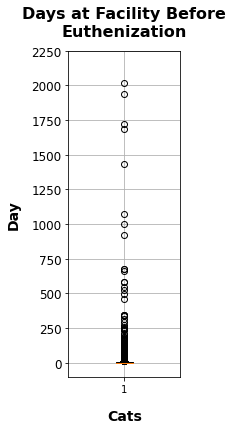

In [62]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_cats['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('Cats', fontweight='bold', fontsize=14, labelpad=15)
ax.set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
ax.set_yticklabels(labels=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250], fontsize=12)

plt.grid(True)
plt.show()

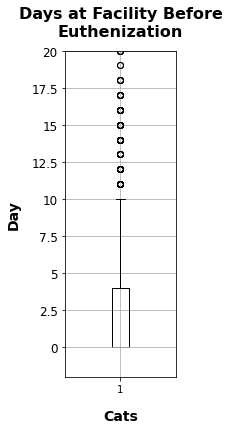

In [63]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_cats['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('Cats', fontweight='bold', fontsize=14, labelpad=15)
ax.set_ylim(-2, 20)
ax.set_yticklabels(labels=[(),0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20], fontsize=12)

plt.grid(True)
plt.show()

##Euthanization Boxplot Graph for Cats and Dogs Comparing Intake to Outcome Days

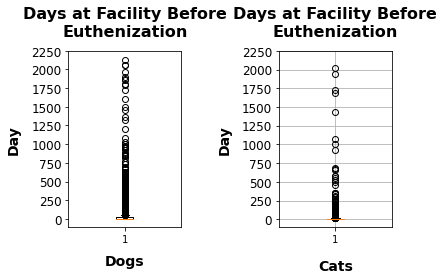

In [212]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(x=euth_dogs['Days to Euth'])

ax1.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax1.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax1.set_xlabel('Dogs', fontweight='bold', fontsize=14, labelpad=10)
ax1.set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
ax1.set_yticklabels(labels=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250], fontsize=12)


ax2.boxplot(x=euth_cats['Days to Euth'])

ax2.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax2.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax2.set_xlabel('Cats', fontweight='bold', fontsize=14, labelpad=15)
ax2.set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
ax2.set_yticklabels(labels=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250], fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

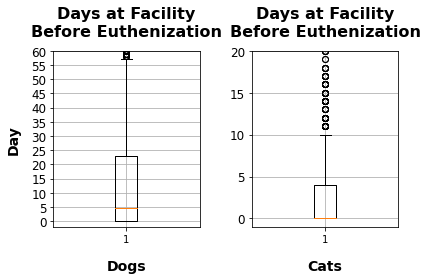

In [210]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(x=euth_dogs['Days to Euth'])

ax1.set_title('Days at Facility\nBefore Euthenization', fontweight='bold', fontsize=16, pad=15)
ax1.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax1.set_xlabel('Dogs', fontweight='bold', fontsize=14, labelpad=15)
ax1.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
ax1.set_yticklabels(labels=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], fontsize=12)
ax1.set_ylim(-2,60)
ax1.grid()

ax2.boxplot(x=euth_cats['Days to Euth'])

ax2.set_title('Days at Facility\nBefore Euthenization', fontweight='bold', fontsize=16, pad=15)
ax2.set_xlabel('Cats', fontweight='bold', fontsize=14, labelpad=15)
ax2.set_ylim(-1, 20)
ax2.set_yticklabels(labels=[(),0, 5, 10, 15, 20], fontsize=12)
ax2.grid()

plt.tight_layout()
plt.show()

In [65]:
euth_dogs.describe()

,Days to Euth
count,2078.000000
mean,60.288739
std,197.638892
min,0.000000
25%,0.000000
50%,4.500000
75%,23.000000
max,2123.000000


In [66]:
euth_cats.describe()

,Days to Euth
count,1978.000000
mean,16.512133
std,108.308347
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,2020.000000


##Euthanization Timeline Boxplot Graph for All Animals

In [67]:
euth_timeline['Days to Euth'].value_counts().sort_index()

-506        1
 0       4370
 1       1753
 2        422
 3        240
         ... 
 1971       1
 2020       1
 2055       1
 2061       1
 2123       1
Name: Days to Euth, Length: 325, dtype: int64

In [68]:
days_to_euth2 = (euth_timeline['Outcome Date'] - euth_timeline['Intake Date']).dt.days.tolist()
days_to_euth2.index(-506)

3845

In [69]:
euth_timeline = euth_timeline.drop(labels=[3845], axis=0)
euth_timeline['Days to Euth'].value_counts().sort_index()

0       4370
1       1753
2        422
3        240
4        352
        ... 
1971       1
2020       1
2055       1
2061       1
2123       1
Name: Days to Euth, Length: 324, dtype: int64

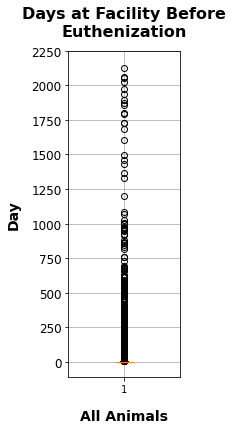

In [70]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_timeline['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('All Animals', fontweight='bold', fontsize=14, labelpad=15)
ax.set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
ax.set_yticklabels(labels=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250], fontsize=12)

plt.grid(True)
plt.show()

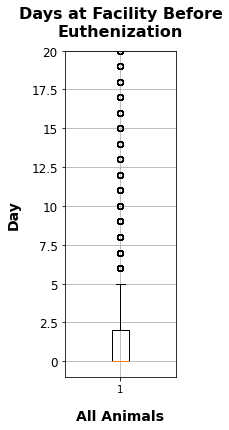

In [71]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_timeline['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('All Animals', fontweight='bold', fontsize=14, labelpad=15)
ax.set_ylim(-1, 20)
ax.set_yticklabels(labels=[(),0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20], fontsize=12)

ax.grid()

plt.show()

###Euthanization Timeline Boxplot for "Other" Animals

In [72]:
euth_other = euth_timeline[(euth_timeline['Animal Type_x'] == 'Other')].reset_index()
euth_other = euth_other.drop('index', axis=1)
euth_other.head()

,Intake DateTime,Animal Type_x,Breed_x,Color_x,Outcome DateTime,Outcome Type,Outcome Subtype,Intake Date,Intake Time,Outcome Date,Outcome Time,Days to Euth
0,2016-03-24 16:39:00,Other,Bat Mix,Brown,2016-03-24 17:17:00,Euthanasia,Rabies Risk,2016-03-24,16:39:00,2016-03-24,17:17:00,0
1,2015-05-19 13:23:00,Other,Hamster Mix,White/Gray,2015-05-19 15:56:00,Euthanasia,Suffering,2015-05-19,13:23:00,2015-05-19,15:56:00,0
2,2018-08-30 11:21:00,Other,Raccoon,Gray/Black,2018-08-30 14:09:00,Euthanasia,Suffering,2018-08-30,11:21:00,2018-08-30,14:09:00,0
3,2014-05-09 09:05:00,Other,Raccoon Mix,Gray/Black,2014-05-09 09:53:00,Euthanasia,Suffering,2014-05-09,09:05:00,2014-05-09,09:53:00,0
4,2015-01-16 16:11:00,Other,Bat Mix,Brown,2015-01-18 09:05:00,Euthanasia,Rabies Risk,2015-01-16,16:11:00,2015-01-18,09:05:00,2


In [73]:
euth_other['Days to Euth'].value_counts().sort_index().head(5)

0    2680
1    1332
2     240
3      84
4      84
Name: Days to Euth, dtype: int64

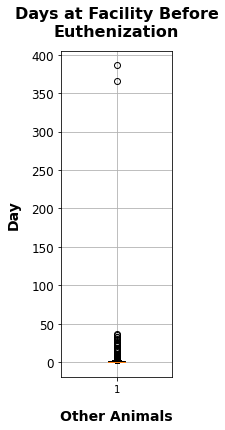

In [74]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_other['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('Other Animals', fontweight='bold', fontsize=14, labelpad=15)
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
ax.set_yticklabels(labels=[0, 50, 100, 150, 200, 250, 300, 350, 400], fontsize=12)

plt.grid(True)
plt.show()

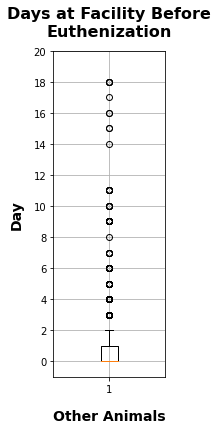

In [75]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.boxplot(x=euth_other['Days to Euth'])

ax.set_title('Days at Facility Before\nEuthenization', fontweight='bold', fontsize=16, pad=15)
ax.set_ylabel('Day', fontweight='bold', fontsize=14, labelpad=10)
ax.set_xlabel('Other Animals', fontweight='bold', fontsize=14, labelpad=15)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

ax.set_ylim(-1,20)

plt.grid(True)
plt.show()

In [76]:
euth_other.describe()

,Days to Euth
count,4493.000000
mean,0.896283
std,8.162307
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,386.000000


##Euthanization Comparison Graph Based on Subtypes for "Other" Animals

In [77]:
euth_other['Outcome Subtype'].value_counts()

Rabies Risk    3482
Suffering       623
Medical         149
Underage         34
At Vet           10
Aggressive        1
Name: Outcome Subtype, dtype: int64

In [78]:
euth_other['Outcome Subtype'].isnull().sum()

194

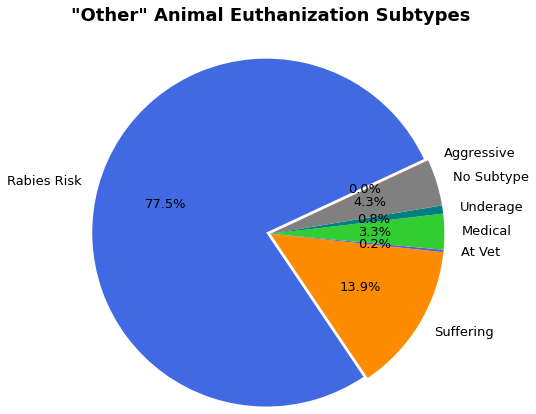

In [214]:
other_labels = ['Rabies Risk', 'Suffering', 'At Vet', 'Medical', 'Underage', 'No Subtype', 'Aggressive']
other_sizes = (3482, 623, 10, 149, 34, 194, 1)

fig, ax = plt.subplots()

ax.pie(x=other_sizes, labels=other_labels, radius=2, autopct='%1.1f%%', explode=[0.05, 0, 0, 0, 0, 0, 0], startangle=25,
       colors=['royalblue', 'darkorange', 'slateblue', 'limegreen', 'teal', 'grey', 'red'], textprops={'fontsize': 13})
      
ax.set_title('"Other" Animal Euthanization Subtypes', fontweight='bold', y=1.45, loc='center', fontsize=18)

plt.show()

##Euthanization Comparison Graph Based on Subtype for Dogs

In [80]:
euth_dogs['Outcome Subtype'].value_counts()

Suffering              889
Aggressive             683
Behavior               183
Rabies Risk            114
Medical                 79
At Vet                  65
Court/Investigation     52
Name: Outcome Subtype, dtype: int64

In [81]:
euth_dogs['Outcome Subtype'].isnull().sum()

13

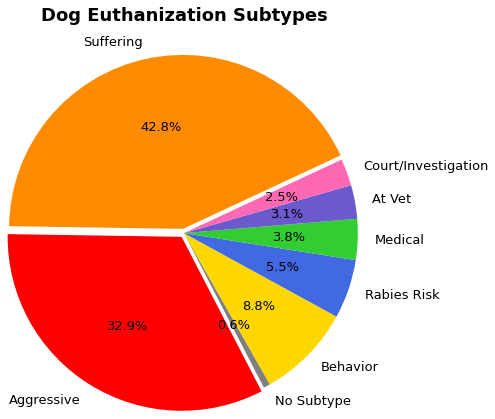

In [217]:
dog_labels = ['Suffering', 'Aggressive', 'No Subtype', 'Behavior', 'Rabies Risk', 'Medical', 'At Vet', 'Court/Investigation']
dog_sizes = (890, 683, 13, 183, 114, 79, 65, 52)

fig, ax = plt.subplots()

ax.pie(x=dog_sizes, labels=dog_labels, radius=2, autopct='%1.1f%%', explode=[0.05, 0.05, 0, 0, 0, 0, 0, 0], startangle=25, 
       colors=['darkorange', 'red', 'grey', 'gold', 'royalblue', 'limegreen', 'slateblue', 'hotpink'], textprops={'fontsize': 13})
ax.set_title('Dog Euthanization Subtypes', fontweight='bold', y=1.45, loc='center', fontsize=18)

plt.show()

##Euthanization Comparison Graph Based on Subtype for Cats

In [83]:
euth_cats['Outcome Subtype'].value_counts()

Suffering      1693
At Vet          103
Rabies Risk      87
Medical          74
Aggressive        4
Underage          1
Name: Outcome Subtype, dtype: int64

In [84]:
euth_cats['Outcome Subtype'].isnull().sum()

16

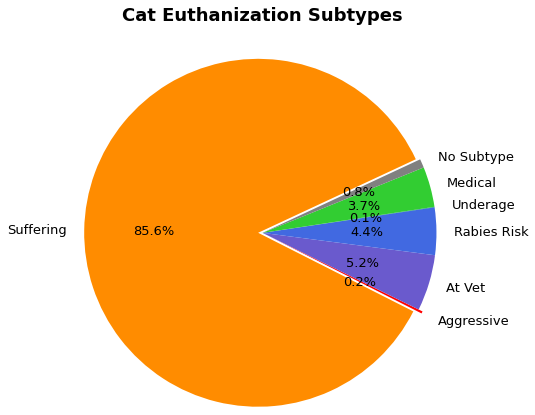

In [219]:
cat_labels = ['Suffering', 'Aggressive', 'At Vet', 'Rabies Risk', 'Underage', 'Medical', 'No Subtype']
cat_sizes = (1693, 4, 103, 87, 1, 74, 16)

fig, ax = plt.subplots()

ax.pie(x=cat_sizes, labels=cat_labels, radius=2, autopct='%1.1f%%', explode=[0.05, 0.05, 0, 0, 0, 0, 0], startangle=25,
       colors=['darkorange', 'red', 'slateblue', 'royalblue', 'teal', 'limegreen', 'grey'], textprops={'fontsize':13})
ax.set_title('Cat Euthanization Subtypes', fontweight='bold', y=1.45, loc='center', fontsize=18)

plt.show()

##Euthanization Subtype Pie Graph Comparing Dogs and Cats

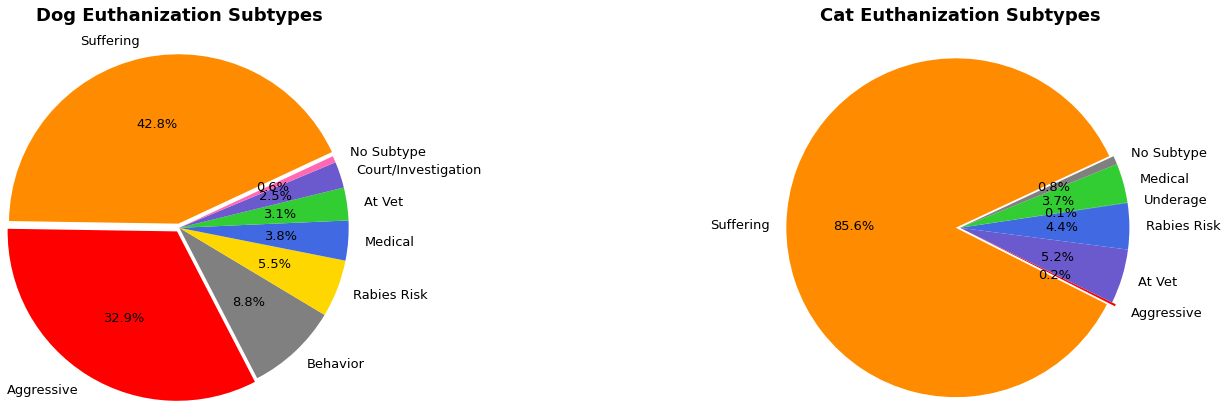

In [232]:
dog_labels = ['Suffering', 'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'At Vet', 'Court/Investigation', 'No Subtype']
dog_sizes = (890, 683, 183, 114, 79, 65, 52, 13)

cat_labels = ['Suffering', 'Aggressive', 'At Vet', 'Rabies Risk', 'Underage', 'Medical', 'No Subtype']
cat_sizes = (1693, 4, 103, 87, 1, 74, 16)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.pie(x=dog_sizes, labels=dog_labels, radius=2, autopct='%1.1f%%', explode=[0.05, 0.05, 0, 0, 0, 0, 0, 0], startangle=25, 
       colors=['darkorange', 'red', 'grey', 'gold', 'royalblue', 'limegreen', 'slateblue', 'hotpink'], textprops={'fontsize': 13})
ax1.set_title('Dog Euthanization Subtypes', fontweight='bold', y=1.45, loc='center', fontsize=18)


ax2.pie(x=cat_sizes, labels=cat_labels, radius=2, autopct='%1.1f%%', explode=[0.05, 0.05, 0, 0, 0, 0, 0], startangle=25,
       colors=['darkorange', 'red', 'slateblue', 'royalblue', 'teal', 'limegreen', 'grey'], textprops={'fontsize':13})
ax2.set_title('Cat Euthanization Subtypes', fontweight='bold', y=1.45, loc='center', fontsize=18)


plt.tight_layout()
plt.show()

##Are 90% of animals not euthanized? Do they go to a home?

In [88]:
outcome_no_index = outcome.drop('index', axis=1)
outcome_no_index.head(3)

,Outcome Type
0,Return to Owner
1,Return to Owner
2,Transfer


In [89]:
outcome_no_index.isnull().sum()

Outcome Type    16
dtype: int64

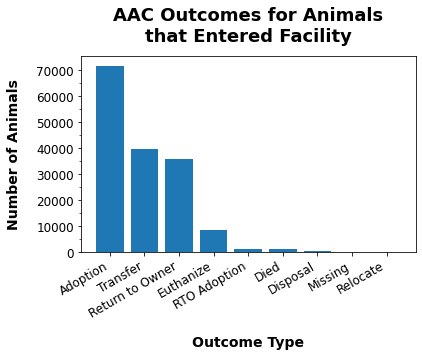

In [135]:
fig, ax = plt.subplots()

plt.bar(x=['Adoption', 'Transfer', 'Return to Owner', 'Euthanize', 'RTO Adoption', 'Died', 'Disposal', 'Missing', 'Relocate'],
        height=animal_shelter['Outcome Type'].value_counts())

plt.xlabel('Outcome Type', fontweight="bold", fontsize=14, labelpad=15)
plt.ylabel('Number of Animals', fontweight="bold", fontsize=14, labelpad=15)
plt.title('AAC Outcomes for Animals\nthat Entered Facility', fontweight='bold', fontsize=18, pad=15)

ax.set_yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
ax.set_yticks([5000, 15000, 25000, 35000, 45000, 55000, 65000], minor=True)

ax.set_xticklabels(labels=['Adoption', 'Transfer', 'Return to Owner', 'Euthanize', 'RTO Adoption', 'Died', 'Disposal', 'Missing', 'Relocate'],
                   fontsize=12)
ax.set_yticklabels(labels=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], fontsize=12)

fig.autofmt_xdate()

plt.show()

In [91]:
outcome_no_index.value_counts()

Outcome Type   
Adoption           71803
Transfer           39824
Return to Owner    35793
Euthanasia          8668
Rto-Adopt           1312
Died                1187
Disposal             566
Missing               91
Relocate              20
dtype: int64

In [92]:
outcome_no_index.value_counts().sum() + outcome_no_index.isnull().sum()

Outcome Type    159280
dtype: int64

In [93]:
#For comparison purposes, I will find out what percent are not euthenized AND what percent have died in general (euthenization, died at facility, 
#and disposal)
#I will also find out what percent are adopted and returned to their owner.

In [122]:
def percentage(a, b):
    return round(a / b * 100, 2)

In [123]:
#Percentage of all euthanizations
percentage(8668, 159280)

5.44

In [124]:
#Percentage of all generalized "died" - died, disposal, and euthanized
general_died = 1187 + 566 + 8668
percentage(general_died, 159280)

6.54

In [125]:
#Percent that have not generally died
100 - 6.54

93.46

In [126]:
#Percentage of just Adoption + RTO adopt
percentage((71803+1312), 159280)

45.9

In [127]:
#Percentage of adoption, return to owner, and rto-adopt
any_adoption = 71803 + 35793 + 1312
percentage(any_adoption, 159280)

68.38

In [128]:
#Percent of transfers
percentage(39824, 159280)

25.0

In [129]:
#Percent of missing and relocated
percentage((20 + 91), 159280)

0.07

In [133]:
#Percentage of all other outcomes besides euthanasia
all_not_euth = 159280 - 8668
percentage(all_not_euth, 159280)

94.56

In [131]:
#Animals "Killed" as described by Best Friends Animal Society
#"Sum of each shelter's non-live outcomes [(Died in Care) + (Lost in Care) + (Shelter Deaths)] - 10% of total intake"
died = general_died + 91
ten_perc_intake = 123365 * .10
non_live_outcomes = died - ten_perc_intake
non_live_outcomes

-1824.5

In [ ]:
#Best friends Animal Society, the no-kill gap
#(Died in Care + Lost in Care + Shelter Deaths*) – (Live Intakes *10%)


In [134]:
#Percent of Animals saves via Best Friends Animal Society
#[(Live Intakes) - (Lost in Care) - (Shelter Deaths*)] divided by (Live Intakes)
(123365 - died)/123365 * 100

91.47894459530661

In [242]:
data_matrix = [['Type of Outcome', 'Percent (%)'],
               ['All Adoptions', '45.9'],
               ['All Adoptions + Returned to Owner', '68.38'],
               ['Transfers', '25'],
               ['Died', '6.54'],
               ['Euthanasia', '5.44'],
               ['Missing + Relocated', '0.07']]

fig =  ff.create_table(data_matrix )
fig.update_layout(width=550)
fig = go.Figure(data=[go.Table(header=dict(values=['Dogs', 'Cats', 'Birds', 'Livestock', 'Other']),
                               cells=dict(values=[[2079], [1978], [117], [1], [4493]])), 
                     ])
fig.update_layout(width=600, title='Animal Types at the Facility Euthanized')

fig.show()fig.show()

In [250]:
fig = go.Figure(data=[go.Table(header=dict(values=['No-Kill Gap', 'Save Rate (%)']),
                               cells=dict(values=[[-1824.5], [91.48]])) 
                     ])
fig.update_layout(width=600)

fig.show()